# Assignment no 15 (Random Forests - Froud data )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv("Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


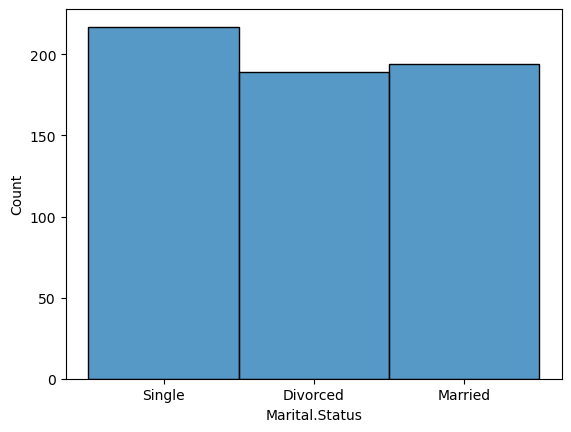

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='Marital.Status', data=data, )
plt.show()

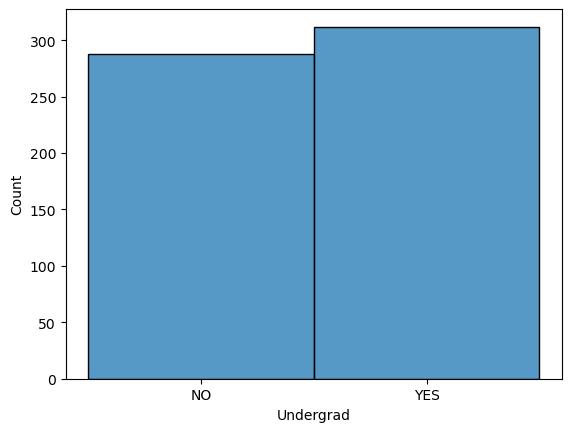

In [30]:
sns.histplot(x='Undergrad', data=data, )
plt.show()

<AxesSubplot:xlabel='Marital.Status', ylabel='Taxable.Income'>

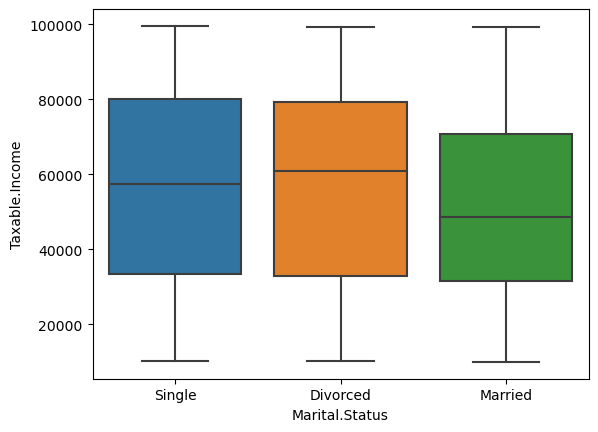

In [28]:
sns.boxplot(data=data, x="Marital.Status", y="Taxable.Income")

<AxesSubplot:xlabel='Work.Experience', ylabel='Undergrad'>

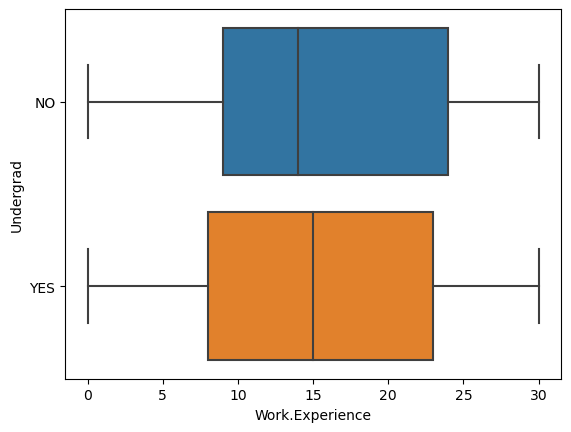

In [19]:
sns.boxplot(data=data, x="Work.Experience", y="Undergrad")

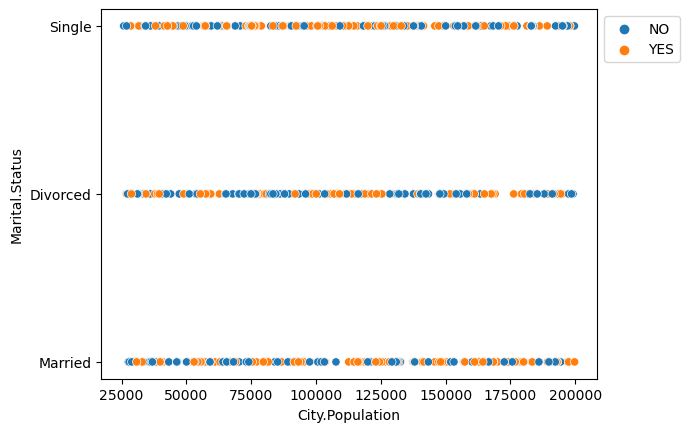

In [33]:
sns.scatterplot( x="City.Population", y='Marital.Status', data=data,
                hue='Undergrad')
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

<AxesSubplot:xlabel='Work.Experience', ylabel='Taxable.Income'>

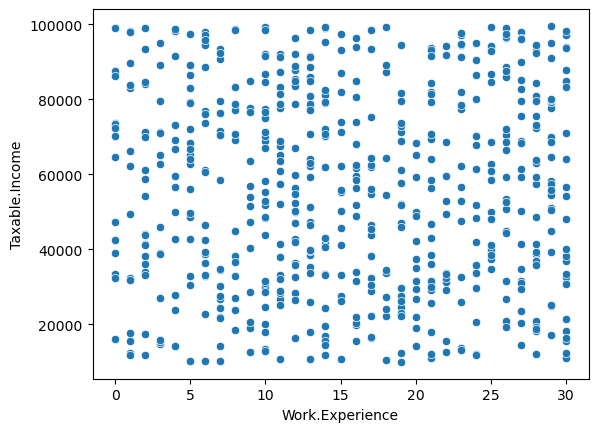

In [18]:
sns.scatterplot(data=data, x="Work.Experience", y="Taxable.Income")

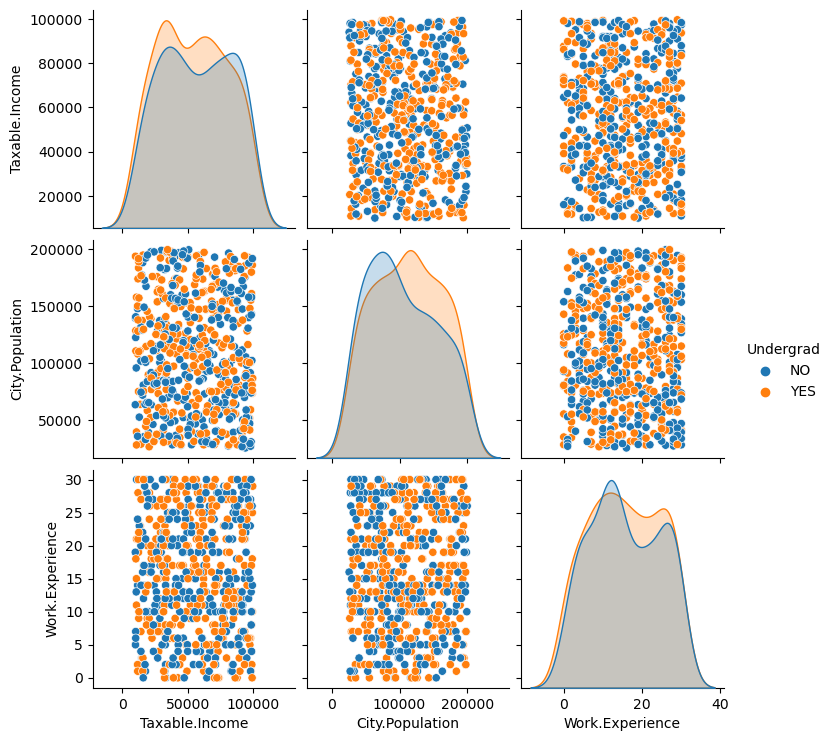

In [11]:
%matplotlib inline
sns.pairplot(data, hue="Undergrad")

In [5]:
##Converting the Taxable income variable to bucketing. 
data["income"]="<=30000"
data.loc[data["Taxable.Income"]>=30000,"income"]="Good"
data.loc[data["Taxable.Income"]<=30000,"income"]="Risky"

In [4]:
# Droping the Taxable income variable :
data.drop(["Taxable.Income"],axis=1,inplace=True)

In [5]:
data.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)


In [6]:
data

,undergrad,marital,population,experience,urban,income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [7]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else:
        pass

In [8]:
data.tail()

,undergrad,marital,population,experience,urban,income
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0
599,0,0,158137,16,0,0


In [9]:
data["income"].value_counts()

0    476
1    124
Name: income, dtype: int64

In [10]:
# Splitting the data into featuers and labels :
features = data.iloc[:,0:5]
labels = data.iloc[:,5]

In [11]:
# Collecting the column names :
colnames = list(data.columns)
predictors = colnames[0:5]
target = colnames[5]

In [12]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,random_state=42)

In [13]:
# Model building :
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(max_depth=2, random_state=0)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [14]:
# Predictions on train data :
prediction = model.predict(x_train)

In [15]:
# Accuracy :
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
accuracy

0.7958333333333333

In [16]:
# Prediction on test data :
pred_test = model.predict(x_test)

In [17]:
# Accuracy :
acc_test =accuracy_score(y_test,pred_test)
acc_test

0.7833333333333333

In [18]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [19]:
confusion

array([[382,   0],
       [ 98,   0]], dtype=int64)